In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Análise de gastos de campanha por candidatos

A análise de dados abaixo utiliza os seguintes arquivos, disponíveis no site do TSE:

- http://agencia.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip
- http://agencia.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2018.zip
- http://agencia.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2018.zip

Os arquivos devem ser colocados em uma pasta chamada `db`, a ser criada na pasta onde esse notebook está instalado. Eles devem ser deszipados em pastas com o nome do arquivo (`votacao_candidato_munzona_2018`, `prestacao_de_contas_eleitorais_candidatos_2018` e `consulta_cand_2018`, respectivamente).

O estudo abaixo foca principalmente em identificar pessoas que obtiveram um gasto pouco eficiente, ou seja, gastaram muito em relação à quantidade de votos recebidos. Isso foca na identificação de possíveis candidatos laranjas.

O conhecimento já público de alguns candidatos de MG e PE com suspeitas de irregularidades auxilia na identificação de parâmetros para categorizar possíveis laranjas.

A análise pode ser vista nesse arquivo, mas caso deseje gerar a base de dados, basta rodar o código abaixo. Ele está no formato Jupyter Notebook (Python 3). Arquivos `csv` estão salvos também, para facilitar a análise dos candidatos com maiores gastos no Excel, por exemplo.

In [2]:
# Função que cria um DataFrame para o estado a ser analisado, ordenado por gastos/votos
def create_df(estado):

    # Votação candidatos
    fname = 'db/votacao_candidato_munzona_2018/votacao_candidato_munzona_2018_'+estado+'.csv'

    df_votos = pd.read_csv(fname, sep=';', encoding='latin_1',
                     usecols=['NR_TURNO', 'SG_UF', 'NM_MUNICIPIO', 'DS_CARGO', 'NR_CANDIDATO',
                              'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
                              'QT_VOTOS_NOMINAIS'])
    df_votos = df_votos.groupby(by=['NR_TURNO', 'SG_UF', 'DS_CARGO', 'NR_CANDIDATO',
                              'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO'],
               as_index=False)['QT_VOTOS_NOMINAIS'].sum()
    df_votos.set_index('NR_CANDIDATO', inplace=True)
    
    
    # Gastos candidatos
    fname = 'db/prestacao_de_contas_eleitorais_candidatos_2018/despesas_contratadas_candidatos_2018_'+estado+'.csv'

    df_gastos = pd.read_csv(fname, sep=';', encoding='latin_1', decimal=',',
                     usecols=['SG_UF', 'DS_CARGO', 'NR_CANDIDATO',
                              'NM_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
                              'VR_DESPESA_CONTRATADA'])
    df_gastos = df_gastos.groupby(by=['SG_UF', 'DS_CARGO', 'NR_CANDIDATO',
                              'NM_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO'],
               as_index=False)['VR_DESPESA_CONTRATADA'].sum()
    df_gastos.set_index('NR_CANDIDATO', inplace=True)
    
    # Perfil candidatos
    fname = 'db/consulta_cand_2018/consulta_cand_2018_'+estado+'.csv'

    df_perfil = pd.read_csv(fname, sep=';', encoding='latin_1', decimal=',',
                     usecols=['SG_UF', 'NR_CANDIDATO', 'DS_SITUACAO_CANDIDATURA', 
                              'DS_DETALHE_SITUACAO_CAND', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
                              'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_SIT_TOT_TURNO'])
    df_perfil.set_index('NR_CANDIDATO', inplace=True)
    
    df = df_votos.join(df_gastos[['VR_DESPESA_CONTRATADA']], on='NR_CANDIDATO', how='left')
    df['VR_DESPESA_POR_VOTOS'] = df['VR_DESPESA_CONTRATADA']/df['QT_VOTOS_NOMINAIS']
    df = df.join(df_perfil[['DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 'DS_GENERO', 
                   'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_SIT_TOT_TURNO']], 
        on='NR_CANDIDATO', how='left')
    df.reset_index(inplace=True)
    df.sort_values('VR_DESPESA_POR_VOTOS', ascending=False, inplace=True)
    
    return df

In [3]:
estados = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',
           'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']

In [4]:
# Carrega um DataFrame com os candidatos de todos os estados
lista_df = []
for estado in estados:
    lista_df.append(create_df(estado))
df = pd.DataFrame()
df = df.append(lista_df, ignore_index=True, sort=False)

In [5]:
df.sort_values('VR_DESPESA_POR_VOTOS', ascending=False, inplace=True)
df

,NR_CANDIDATO,NR_TURNO,SG_UF,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,VR_DESPESA_POR_VOTOS,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_SIT_TOT_TURNO
0,15100,1,AC,Deputado Estadual,ESPERIDIÃO MENEZES JUNIOR,ESPERIDIÃO JUNIOR,15,MDB,0,84993.80,inf,INAPTO,INDEFERIDO,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,NÃO ELEITO
23050,1711,1,SE,Deputado Federal,JOSÉ LUIZ DA MOTA CRUZ,LUIZAO DONA TRAMPI,17,PSL,0,6259.50,inf,INAPTO,INDEFERIDO,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,NÃO ELEITO
23538,1566,1,SP,Deputado Federal,CARLOS ANTONIO FERREIRA DOS SANTOS,CARLÃO DA PROTEÇÃO,15,MDB,0,107371.25,inf,INAPTO,INDEFERIDO,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),PARDA,NÃO ELEITO
23537,4507,1,SP,Deputado Federal,EVALDO RUI VICENTINI,VICENTINI,45,PSDB,0,100003.28,inf,APTO,INDEFERIDO COM RECURSO,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,NÃO ELEITO
23061,43555,1,SE,Deputado Estadual,NELSON ARAUJO DOS SANTOS,NELSON ARAUJO,43,PV,0,1000.00,inf,APTO,INDEFERIDO COM RECURSO,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,NÃO ELEITO
23060,14222,1,SE,Deputado Estadual,DOMINGOS SAVIO DOS SANTOS,DR. SAVIO,14,PTB,0,300.00,inf,INAPTO,RENÚNCIA,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,NÃO ELEITO
23059,45123,1,SE,Deputado Estadual,PEDRO FIRMINO DE ANDRADE,PEDRO FIRMINO,45,PSDB,0,5128.55,inf,INAPTO,INDEFERIDO,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,NÃO ELEITO
23058,43444,1,SE,Deputado Estadual,JOSÉ TAVARES SANTOS,TAVARES,43,PV,0,1000.00,inf,INAPTO,INDEFERIDO,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,NÃO ELEITO
23057,25100,1,SE,Deputado Estadual,MIRZA TAMARA PRADO SANTOS LEÃO,MIRZA PRADO,25,DEM,0,1060.00,inf,INAPTO,INDEFERIDO,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,NÃO ELEITO
23056,4444,1,SE,Deputado Federal,NACELIO SANTOS DE ANDRADE,NACÉLIO ANDRADE,44,PRP,0,5102.13,inf,INAPTO,INDEFERIDO,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,NÃO ELEITO


## Boxplot dos gastos de cada candidato por voto

O gráfico abaixo é um boxplot, que mostra os gastos por voto para todos os candidatos:

- A linha vertical representa a mediana dos gastos (no universo de candidatos, em torno de R$10/voto).
- O quadrado colorido representa os primeiro e terceiro quartis, ou seja, dentro dele estão 50\% dos candidatos.
- Entre as linhas verticais nos extremos estão 99.3\% dos candidatos, assumindo uma distribuição normal.
- Finalmente, os pontos marcam os candidatos *outliers*, ou seja, que se destacam do restante.

Pode-se dizer que os *outliers* costumam gastar mais de R$50/voto recebido.

Os candidatos com zero votos foram removidos da análise, pois provavelmente tiveram sua candidatura indeferida.

Atenção que o eixo com os valores de gasto/voto está em escala logarítmica, com valores mostrados em potência de 10.

### Gastos em função da situação do candidato

Pode-se notar que os candidatos com registro cancelado apresentam gastos/voto cerca de 10 vezes maior que os demais candidatos com candidatura deferida.

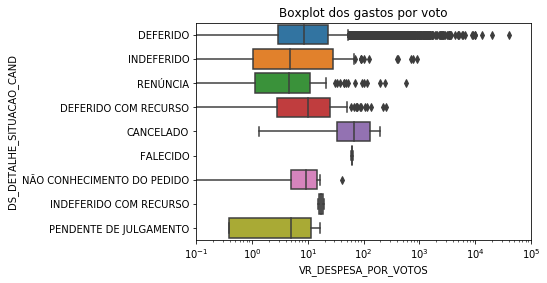

In [6]:
ax2 = sns.boxplot(data=df[df['QT_VOTOS_NOMINAIS'] != 0], x='VR_DESPESA_POR_VOTOS', y='DS_DETALHE_SITUACAO_CAND')
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto')
plt.show()

### Gastos em função do estado civil do candidato

Nenhum padrão significativo foi encontrado em função do estado civil.

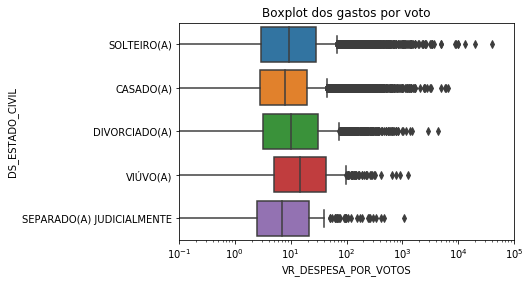

In [7]:
ax2 = sns.boxplot(data=df[df['QT_VOTOS_NOMINAIS'] != 0], x='VR_DESPESA_POR_VOTOS', y='DS_ESTADO_CIVIL')
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto')
plt.show()

### Gastos em função do cargo pretendido

Nota-se que a campanha para senador é cerca de 10 vezes mais barata que a dos deputados, sendo a de governador em nível intermediário.

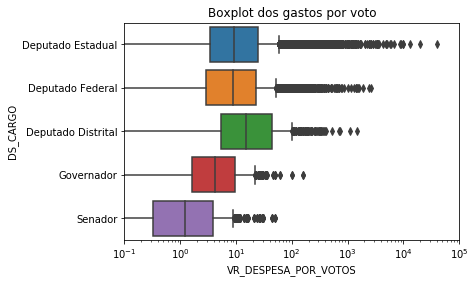

In [8]:
ax2 = sns.boxplot(data=df[df['QT_VOTOS_NOMINAIS'] != 0], x='VR_DESPESA_POR_VOTOS', y='DS_CARGO')
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto')
plt.show()

### Gastos em função da cor/raça

Nenhum padrão significativo foi encontrado em função da cor/raça dos candidatos.

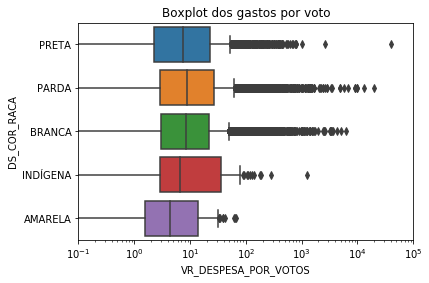

In [9]:
ax2 = sns.boxplot(data=df[df['QT_VOTOS_NOMINAIS'] != 0], x='VR_DESPESA_POR_VOTOS', y='DS_COR_RACA')
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto')
plt.show()

### Gastos em função do resultado da campanha eleitoral

Nota-se que os candidatos eleitos apenas com seus votos (sem uso de quociente eleitoral, por exemplo) são os que apresentam menores gastos. Talvez isso aconteça também pois os senadores se enquadram nessa categoria, e eles apresentam um baixo gasto por voto recebido.

Todas as demais categorias de candidatos apresentam gastos entre R$\$$5 e R$\$$10/voto, com os maiores *outliers* nas categorias "suplente" e "não eleito". No entanto, ambos juntos representam mais de 90% dos candidatos, o que faz com que esse resultado não seja muito significativo.

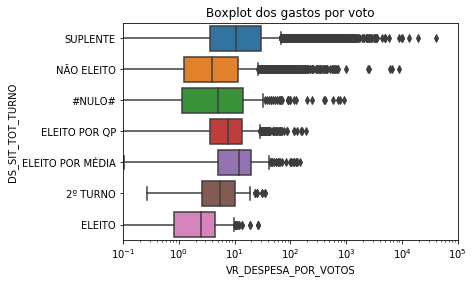

In [10]:
ax2 = sns.boxplot(data=df[df['QT_VOTOS_NOMINAIS'] != 0], x='VR_DESPESA_POR_VOTOS', y='DS_SIT_TOT_TURNO')
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto')
plt.show()

In [11]:
for status in df['DS_SIT_TOT_TURNO'].unique():
    print('%s: %d candidatos (%3.1f%%)' % (status, (df['DS_SIT_TOT_TURNO']==status).sum(), 
                                         100*(df['DS_SIT_TOT_TURNO']==status).sum()/len(df)))

NÃO ELEITO: 6778 candidatos (24.5%)
SUPLENTE: 18664 candidatos (67.6%)
#NULO#: 255 candidatos (0.9%)
ELEITO POR QP: 1275 candidatos (4.6%)
ELEITO POR MÉDIA: 298 candidatos (1.1%)
2º TURNO: 104 candidatos (0.4%)
ELEITO: 236 candidatos (0.9%)
nan: 0 candidatos (0.0%)


### Gastos em função do gênero dos candidatos

Nota-se que as candidatas do gênero feminino tem uma mediana de gasto/voto cerca de três vezes maior que os homens, além de possuírem *outliers* mais de 10 vezes maiores.

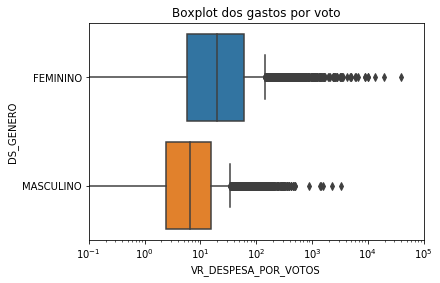

In [12]:
ax2 = sns.boxplot(data=df[df['QT_VOTOS_NOMINAIS'] != 0], x='VR_DESPESA_POR_VOTOS', y='DS_GENERO')
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto')
plt.show()

In [13]:
for genero in df['DS_GENERO'].unique():
    print('%s: %d candidatos (%3.1f%%)' % (genero, (df['DS_GENERO']==genero).sum(), 
                                         100*(df['DS_GENERO']==genero).sum()/len(df)))

MASCULINO: 19028 candidatos (68.9%)
FEMININO: 8582 candidatos (31.1%)
nan: 0 candidatos (0.0%)


### Gastos em função da UF

Nota-se que a maioria dos estados possui um gasto mediano de R$\$$8/voto, com exceção de alguns estados que oscilam entre R$\$$20 e R$\$$30/voto.

Alguns estados com maiores gastos (AC, AP, RR, RO, TO, MS, MT) podem justificar uma maior média de gastos por causa de grandes distâncias a serem percorridas durante a campanha em um estado com pouca infra-estrutura de transportes.

Já em relação ao DF, também com gastos acima da média, essa explicação não é aplicável.

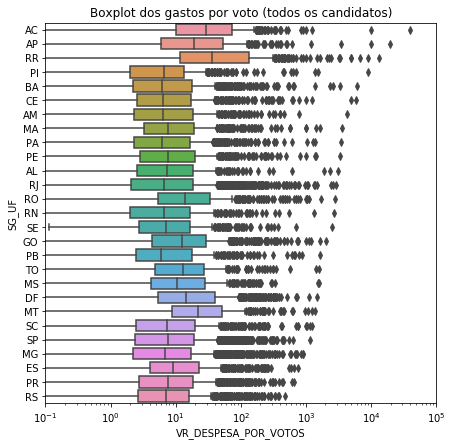

In [14]:
fig, ax2 = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[df['QT_VOTOS_NOMINAIS'] != 0], x='VR_DESPESA_POR_VOTOS', y='SG_UF', ax=ax2)
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto (todos os candidatos)')
plt.show()

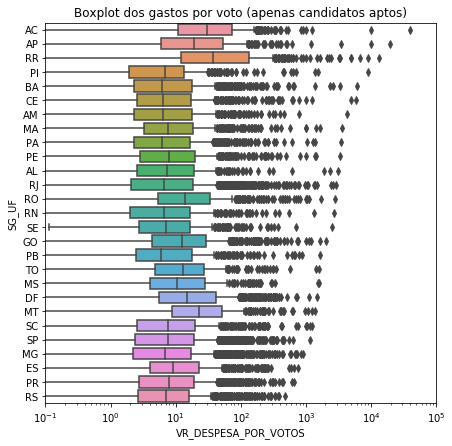

In [15]:
fig, ax2 = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[(df['QT_VOTOS_NOMINAIS'] != 0) & (df['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO')], x='VR_DESPESA_POR_VOTOS', y='SG_UF', ax=ax2)
ax2.set(xscale='log')
ax2.set(xlim=(1e-1, 1e5))
plt.title('Boxplot dos gastos por voto (apenas candidatos aptos)')
plt.show()

In [16]:
percent = np.sum(df['VR_DESPESA_POR_VOTOS'] > 100)/len(df)*100
print('Porcentagem de candidatos com gasto maior que R$100/voto no Brasil: %3.1f%%' % percent)

Porcentagem de candidatos com gasto maior que R$100/voto no Brasil: 6.0%


## Lista de candidatos com gastos muito acima da média

A lista abaixo indica candidatos com gastos elevados e que podem apresentar indícios de desvio de verbas partidárias. O filtro considera:

- Candidatos com votos não-nulos.
- Total de gastos contratados maiores que R\$30 mil.
- Gasto/voto maior que R\$100/voto.

In [17]:
# Lista de candidatos com votos não-nulos, com gastos maiores que R$30 mil e mais de R$100/voto
condicao = (df['QT_VOTOS_NOMINAIS'] != 0) & \
           (df['VR_DESPESA_CONTRATADA'] > 30000) & \
           (df['VR_DESPESA_POR_VOTOS'] > 100)
df[condicao]

,NR_CANDIDATO,NR_TURNO,SG_UF,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,VR_DESPESA_POR_VOTOS,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_SIT_TOT_TURNO
6,25998,1,AC,Deputado Estadual,SONIA DE FATIMA SILVA ALVES,SONIA,25,DEM,6,240159.23,40026.538333,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PRETA,SUPLENTE
20336,22147,1,RR,Deputado Estadual,MILENE ALVES DO NASCIMENTO,MILENE NASCIMENTO,22,PR,3,40013.00,13337.666667,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,SUPLENTE
14030,22555,1,PI,Deputado Estadual,TAMIRES ALMEIDA VASCONCELOS,TAMIRES VASCONCELOS,22,PR,41,369912.55,9022.257317,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,SUPLENTE
20337,55158,1,RR,Deputado Estadual,REGIANE DA FONSECA BRAGA,REGIANE BRAGA,55,PSD,9,79613.20,8845.911111,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,NÃO ELEITO
20338,55550,1,RR,Deputado Estadual,LUCENIR VASCONCELOS DE OLIVEIRA LICATA,LUCENIR LICATA,55,PSD,9,60000.00,6666.666667,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,NÃO ELEITO
2462,77500,1,BA,Deputado Estadual,DEIZE RAMOS DA SILVA,DEIZE,77,SOLIDARIEDADE,9,55000.00,6111.111111,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO INCOMPLETO,CASADO(A),BRANCA,NÃO ELEITO
3595,90088,1,CE,Deputado Estadual,DÉBORA RIBEIRO DOS SANTOS,DÉBORA RIBEIRO,90,PROS,47,274018.40,5830.178723,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,SUPLENTE
1020,90333,1,AM,Deputado Estadual,ADRIANA MOURA DE MENDONÇA,ADRIANA MOURA,90,PROS,41,177150.00,4320.731707,APTO,DEFERIDO,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,SUPLENTE
7505,10010,1,MA,Deputado Estadual,MARISA REGINA DUARTE TEIXEIRA,MARISA ROSAS,10,PRB,161,584899.80,3632.918012,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,SUPLENTE
11555,90111,1,PA,Deputado Estadual,CLIVIA PINHEIRO LEÃO,CLIVIA LEÃO,90,PROS,49,169890.05,3467.143878,APTO,DEFERIDO,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,SUPLENTE


In [18]:
print('A lista com %d candidatos acima gastou R$%.2f, recebendo %d votos. Ela contém %3.1f%% de mulheres.\nO gasto com esses candidatos corresponde a %3.2f%% dos gastos totais.' % 
      (len(df[condicao]), 
       df[condicao]['VR_DESPESA_CONTRATADA'].sum(), 
       df[condicao]['QT_VOTOS_NOMINAIS'].sum(), 
       100*(df[condicao]['DS_GENERO'] == 'FEMININO').sum()/len(df[condicao]),
       100*df[condicao]['VR_DESPESA_CONTRATADA'].sum()/df['VR_DESPESA_CONTRATADA'].sum()))

A lista com 685 candidatos acima gastou R$163374561.00, recebendo 885324 votos. Ela contém 81.8% de mulheres.
O gasto com esses candidatos corresponde a 3.35% dos gastos totais.


In [19]:
# Exportar lista de candidatos com gastos muito acima da média em formato csv
df[condicao].to_csv('candidatos_RS30mil_100porvoto.csv')

## Lista de candidatos com gastos muito acima da média e menos que mil votos

A lista abaixo indica candidatos com gastos elevados e que podem apresentar indícios de desvio de verbas partidárias. O filtro considera:

- Candidatos com votos não-nulos.
- Total de gastos contratados maiores que R\$30 mil.
- Gasto/voto maior que R\$50/voto.
- Receberam menos que 1000 votos.

In [20]:
# Lista de candidatos com votos não-nulos, com gastos maiores que R$15 mil e mais de R$100/voto, e que receberam menos que mil votos
condicao = (df['QT_VOTOS_NOMINAIS'] != 0) & \
           (df['VR_DESPESA_CONTRATADA'] > 30000) & \
           (df['VR_DESPESA_POR_VOTOS'] > 50) & \
           (df['QT_VOTOS_NOMINAIS'] < 1000)
# Exportar lista de candidatos com gastos muito acima da média em formato csv
df[condicao].to_csv('candidatos_RS30mil_50porvoto_1000votos.csv')
df[condicao]

,NR_CANDIDATO,NR_TURNO,SG_UF,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,VR_DESPESA_POR_VOTOS,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_SIT_TOT_TURNO
6,25998,1,AC,Deputado Estadual,SONIA DE FATIMA SILVA ALVES,SONIA,25,DEM,6,240159.23,40026.538333,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PRETA,SUPLENTE
20336,22147,1,RR,Deputado Estadual,MILENE ALVES DO NASCIMENTO,MILENE NASCIMENTO,22,PR,3,40013.00,13337.666667,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,SUPLENTE
14030,22555,1,PI,Deputado Estadual,TAMIRES ALMEIDA VASCONCELOS,TAMIRES VASCONCELOS,22,PR,41,369912.55,9022.257317,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,SUPLENTE
20337,55158,1,RR,Deputado Estadual,REGIANE DA FONSECA BRAGA,REGIANE BRAGA,55,PSD,9,79613.20,8845.911111,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,NÃO ELEITO
20338,55550,1,RR,Deputado Estadual,LUCENIR VASCONCELOS DE OLIVEIRA LICATA,LUCENIR LICATA,55,PSD,9,60000.00,6666.666667,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,NÃO ELEITO
2462,77500,1,BA,Deputado Estadual,DEIZE RAMOS DA SILVA,DEIZE,77,SOLIDARIEDADE,9,55000.00,6111.111111,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO INCOMPLETO,CASADO(A),BRANCA,NÃO ELEITO
3595,90088,1,CE,Deputado Estadual,DÉBORA RIBEIRO DOS SANTOS,DÉBORA RIBEIRO,90,PROS,47,274018.40,5830.178723,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,SUPLENTE
1020,90333,1,AM,Deputado Estadual,ADRIANA MOURA DE MENDONÇA,ADRIANA MOURA,90,PROS,41,177150.00,4320.731707,APTO,DEFERIDO,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,SUPLENTE
7505,10010,1,MA,Deputado Estadual,MARISA REGINA DUARTE TEIXEIRA,MARISA ROSAS,10,PRB,161,584899.80,3632.918012,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,SUPLENTE
11555,90111,1,PA,Deputado Estadual,CLIVIA PINHEIRO LEÃO,CLIVIA LEÃO,90,PROS,49,169890.05,3467.143878,APTO,DEFERIDO,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,SUPLENTE


In [21]:
print('A lista com %d candidatos acima gastou R$%.2f, recebendo %d votos. Ela contém %3.1f%% de mulheres.\nO gasto com esses candidatos corresponde a %3.2f%% dos gastos totais.' % 
      (len(df[condicao]), 
       df[condicao]['VR_DESPESA_CONTRATADA'].sum(), 
       df[condicao]['QT_VOTOS_NOMINAIS'].sum(), 
       100*(df[condicao]['DS_GENERO'] == 'FEMININO').sum()/len(df[condicao]),
       100*df[condicao]['VR_DESPESA_CONTRATADA'].sum()/df['VR_DESPESA_CONTRATADA'].sum()))

A lista com 722 candidatos acima gastou R$69352820.52, recebendo 326196 votos. Ela contém 80.1% de mulheres.
O gasto com esses candidatos corresponde a 1.42% dos gastos totais.


/home/doug/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'SG_PARTIDO' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


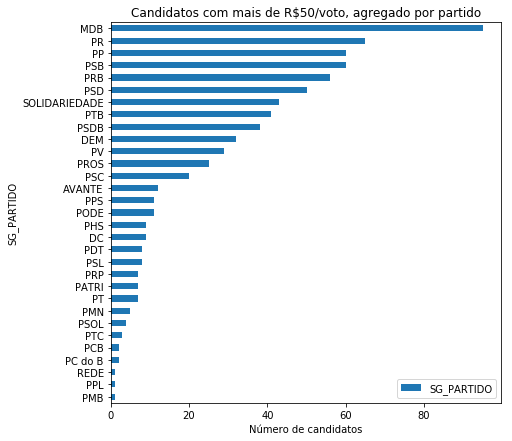

In [22]:
df[condicao].groupby('SG_PARTIDO')['SG_PARTIDO'].count().to_frame().sort_values('SG_PARTIDO', ascending=True).plot.barh(figsize=(7,7))
plt.xlabel('Número de candidatos')
plt.title('Candidatos com mais de R$50/voto, agregado por partido')
plt.legend(loc='lower right')
plt.show()

/home/doug/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'SG_UF' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


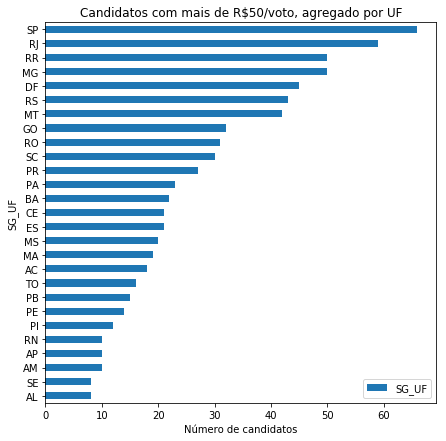

In [23]:
df[condicao].groupby('SG_UF')['SG_UF'].count().to_frame().sort_values('SG_UF', ascending=True).plot.barh(figsize=(7,7))
plt.xlabel('Número de candidatos')
plt.title('Candidatos com mais de R$50/voto, agregado por UF')
plt.legend(loc='lower right')
plt.show()

## Validação com dados divulgados na mídia

As tabelas abaixo mostram uma validação com os candidatos suspeitos do PSL que foram divulgados na mídia, nos estados de PE e MG. Pode-se notar que os casos suspeitos representam os candidatos com maiores gastos/voto para o partido e estado.

In [24]:
# Análise para estado de Pernanbuco
condicao = (df['QT_VOTOS_NOMINAIS'] != 0) & \
           (df['SG_PARTIDO'] == 'PSL') & \
           (df['SG_UF'] == 'PE')
df[condicao].head()

,NR_CANDIDATO,NR_TURNO,SG_UF,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,VR_DESPESA_POR_VOTOS,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_SIT_TOT_TURNO
12985,1730,1,PE,Deputado Federal,MARIA DE LOURDES PAIXÃO SANTOS,LOURDES PAIXÃO,17,PSL,274,392020.00,1430.729927,APTO,DEFERIDO,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SUPLENTE
12999,17817,1,PE,Deputado Estadual,ÉRIKA SIQUEIRA SANTOS,ÉRIKA SIQUEIRA,17,PSL,1315,300600.00,228.593156,APTO,DEFERIDO,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,SUPLENTE
13021,17317,1,PE,Deputado Estadual,MARIANA NUNES DE ARAÚJO,MARIANA NUNES,17,PSL,1741,127860.00,73.440551,APTO,DEFERIDO,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SUPLENTE
13104,17217,1,PE,Deputado Estadual,NERIVALDO ALVES CORDEIRO,BILÚ CORDEIRO,17,PSL,1875,45000.00,24.000000,APTO,DEFERIDO,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SUPLENTE
13157,1717,1,PE,Deputado Federal,LUCIANO CALDAS BIVAR,LUCIANO BIVAR,17,PSL,117943,1936189.51,16.416316,APTO,DEFERIDO,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ELEITO POR QP


In [25]:
# Análise para estado de Minas Gerais
condicao = (df['QT_VOTOS_NOMINAIS'] != 0) & \
           (df['SG_PARTIDO'] == 'PSL') & \
           (df['SG_UF'] == 'MG')
df[condicao].head(7)

,NR_CANDIDATO,NR_TURNO,SG_UF,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,VR_DESPESA_POR_VOTOS,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_SIT_TOT_TURNO
8270,17033,1,MG,Deputado Estadual,LILIAN BERNARDINO DE ALMEIDA MARCHEZINI,LILIAN BERNARDINO,17,PSL,196,65000.0,331.632653,APTO,DEFERIDO,FEMININO,SUPERIOR INCOMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,SUPLENTE
8280,1776,1,MG,Deputado Federal,CAMILA FERNANDES ROSA,MILLA FERNANDES,17,PSL,334,72000.0,215.568862,APTO,DEFERIDO,FEMININO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,SUPLENTE
8328,1739,1,MG,Deputado Federal,NAFTALI TAMAR DE OLIVEIRA NERES,NAFTALI TAMAR,17,PSL,669,60000.0,89.686099,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SUPLENTE
8339,17028,1,MG,Deputado Estadual,DEBORA GOMES DA SILVEIRA,DEBORA GOMES,17,PSL,885,71990.0,81.344633,APTO,DEFERIDO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SUPLENTE
8466,17880,1,MG,Deputado Estadual,JÚLIO PASSOS DE FARIA,JÚLIO HUBNER,17,PSL,3560,110590.0,31.064607,APTO,DEFERIDO,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SUPLENTE
8470,1763,1,MG,Deputado Federal,SILVIA MARA DE OLIVEIRA CAETANO,SILVIA OLIVEIRA,17,PSL,65,2000.0,30.769231,APTO,DEFERIDO,FEMININO,SUPERIOR INCOMPLETO,VIÚVO(A),BRANCA,SUPLENTE
8483,17778,1,MG,Deputado Estadual,CLEUZENIR SOUZA BARBOSA PEREIRA,CLEUZENIR BARBOSA,17,PSL,2097,60823.5,29.005007,APTO,DEFERIDO,FEMININO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PRETA,SUPLENTE


# Conclusões

Essa rápida análise sugere que realmente existem muitos casos suspeitos de candidatos de fachada, que recebem vultuosas quantias de dinheiro e acabam convertendo esse gasto em uma quantidade inexpressiva de votos. Indícios existem de que esse desvio de verbas é feito principalmente com candidatas do sexo feminino, para as quais os partidos são obrigados a direcionar uma verba mínima.

Um critério sugerido para filtrar os candidatos com gastos suspeitos é:

- Candidatos com votos não-nulos.
- Total de gastos contratados maiores que R\$30 mil.
- Gasto/voto maior que R\$50/voto.
- Receberam menos que 1000 votos.

Isso representa um total de 722 candidatos, com soma de gastos da ordem de R\$69 milhões de reais e composto por 80% de mulheres.

# Sugestões para próximos passos

- Verificar os gastos e receitas individuais dos candidatos "ineficientes" financeiramente:
  - Analisar quantidade de grandes aportes, e principais fontes de receita.
  - Identificar prestadores de serviço comuns entre candidatos "ineficientes".
  - Analisar prestadores de serviço em função de seu CNPJ.
    - Identificar tamanho da empresa e capacidade de fornecer serviço contratado (utilizando dados de juntas comerciais dos estados, por exemplo).